In [2]:
#!pip install name
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [19]:
df.shape

(60, 2)

In [6]:
df.area.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [7]:
#area is independent feature, x
#rent is dept. y
x = df['area']
y = df['rent']

In [8]:
x.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [9]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# Least Square Method

In [10]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [11]:
mean_x

2289.0

In [12]:
df.area.mean()

2289.0

In [13]:
#calculate deviations
dev_x = x - mean_x
dev_y = y - mean_y

In [14]:
dev_x.head()

0   -289.0
1   -189.0
2    211.0
3    -39.0
4    711.0
Name: area, dtype: float64

In [15]:
dev_y.head()

0    -5769.166667
1    -2269.166667
2     3780.833333
3    -1169.166667
4    14830.833333
Name: rent, dtype: float64

# Equations

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

# slope

In [16]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2) 

In [17]:
m

21.292661473611954

In [21]:
df.head(3)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050


In [22]:
df.tail(1)

,area,rent
59,3100,51600


# Intercept, c

In [23]:
c = mean_y - m*mean_x

In [24]:
c

-11469.7354464311

In [25]:
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 21.292661473611954
Intercept (c): -11469.7354464311


In [27]:
new_x = float(input('Enter any value of area: '))
pred1 = m*new_x + c
print('predicted rent is: {rent}'.format(rent=pred1))

Enter any value of area: 2000
predicted rent is: 31115.58750079281


In [28]:
31500 - 31115.58750079281

384.4124992071884

# SKlean

In [29]:
from sklearn.linear_model import LinearRegression 

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(df[['area']], y)

LinearRegression()

In [32]:
reg.coef_

array([21.29266147])

In [36]:
m

21.292661473611954

In [33]:
reg.intercept_

-11469.735446431136

In [34]:
c

-11469.7354464311

In [37]:
reg.predict([[2000]])

array([31115.58750079])

In [38]:
pred1 # manual

31115.58750079281

# Foramal Work

Text(0.5, 1.0, 'area-rent visualization')

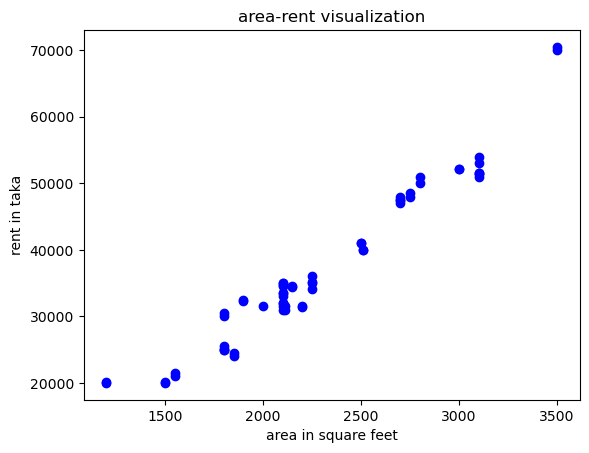

In [51]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')

# Data Split

In [53]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [54]:
from sklearn.model_selection import train_test_split

In [71]:
x = df.drop('rent', axis=1) # 1 for col and 0 for rows ; df[['area']] 
y = df[['rent']]

In [72]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [73]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=.30)

In [75]:
xtrain.head() # 70% data

,area
39,2100
19,2700
36,1500
44,2250
52,3500


In [76]:
ytrain.head()

,rent
39,31500
19,47000
36,20200
44,35000
52,70500


In [77]:
xtest.head()

,area
8,2700
35,1900
16,1800
25,3100
6,1500


In [78]:
xtest.shape

(18, 1)

In [79]:
xtrain.shape


(42, 1)

In [80]:
reg.fit(xtrain, ytrain) # training ml model with train data

LinearRegression()

In [81]:
reg.predict(xtest) #input area and it will return predicted rent

array([[46112.99779052],
       [28706.78073485],
       [26531.00360289],
       [54816.10631836],
       [20003.67220701],
       [27618.89216887],
       [54816.10631836],
       [54816.10631836],
       [33058.33499877],
       [33058.33499877],
       [35234.11213073],
       [13476.34081114],
       [41761.4435266 ],
       [33058.33499877],
       [63519.21484619],
       [54816.10631836],
       [26531.00360289],
       [33058.33499877]])

In [82]:
ytest.head()

,rent
8,48000
35,32300
16,30500
25,53000
6,20000


In [83]:
ytest['predicted_y'] = reg.predict(xtest)

In [84]:
ytest.head()

,rent,predicted_y
8,48000,46112.997791
35,32300,28706.780735
16,30500,26531.003603
25,53000,54816.106318
6,20000,20003.672207


In [85]:
len(ytest)

18

In [86]:
ytest.drop('predicted_y', axis=1, inplace=True)

In [87]:
ytest.head()

,rent
8,48000
35,32300
16,30500
25,53000
6,20000


In [88]:
#training score
reg.score(xtrain, ytrain)

0.9538989530589385

In [89]:
#testing accuracy
reg.score(xtest, ytest)

0.9428523709664158

# MSE & MAE

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [91]:
mse = mean_squared_error(ytest, reg.predict(xtest))

In [92]:
mse

10078630.941997712

In [95]:
mean_absolute_error(ytest, reg.predict(xtest))

2553.1783957746484

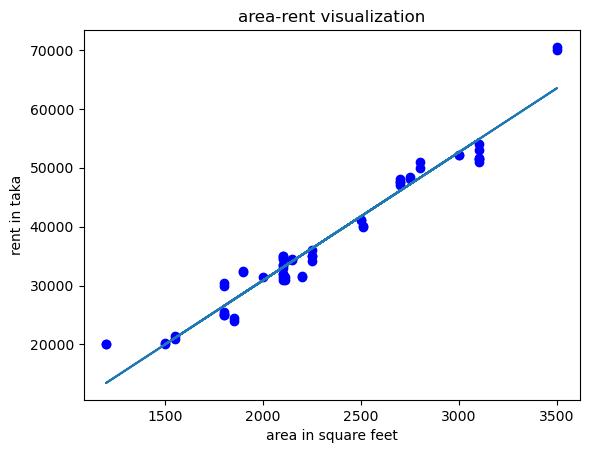

In [102]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest, reg.predict(xtest))

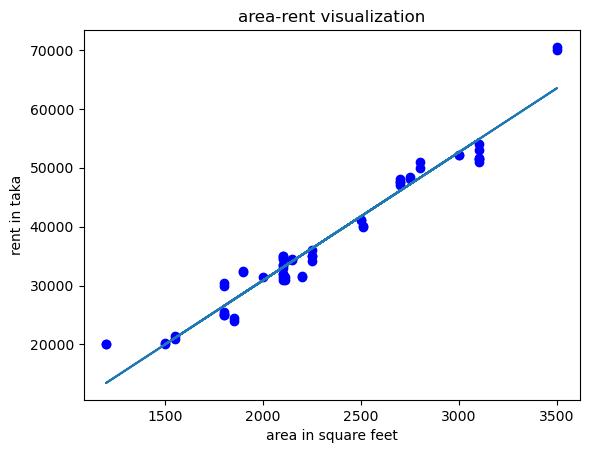

In [103]:
plt.scatter(x, y, color='blue') # 2D PLot
plt.xlabel('area in square feet')
plt.ylabel('rent in taka')
plt.title('area-rent visualization')
plt.plot(xtest.squeeze(), reg.predict(xtest))